In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the path to your data folder
data_dir = "C:/Users/Semi/Desktop/projects done/Sign language detection/data/"

def load_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)
    num_classes = len(class_folders)

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize images to a common size
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(i)  # Assigning label based on folder index

    images = np.array(images)
    labels = to_categorical(np.array(labels), num_classes)  # Convert labels to categorical format
    return images, labels, num_classes, class_folders

# Load and preprocess the data
images, labels, num_classes, class_folders = load_data(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))



C:\Users\Semi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 554ms/step - accuracy: 0.7088 - loss: 1.0515 - val_accuracy: 0.9888 - val_loss: 0.0261
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 99s 494ms/step - accuracy: 0.9931 - loss: 0.0343 - val_accuracy: 0.9925 - val_loss: 0.0315
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 103s 511ms/step - accuracy: 0.9967 - loss: 0.0135 - val_accuracy: 0.9938 - val_loss: 0.0328
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 103s 510ms/step - accuracy: 0.9950 - loss: 0.0432 - val_accuracy: 0.9925 - val_loss: 0.0250
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 102s 506ms/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9975 - val_loss: 0.0135
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 104s 520ms/step - accuracy: 0.9982 - loss: 0.0130 - val_accuracy: 0.9950 - val_loss: 0.0156
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 102s 509ms/step - accuracy: 0.9973 - loss: 0.0138 - val_accuracy: 0.9938 - val_loss: 0.0149
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 104s 516ms/step - accuracy: 0.9973 - 

In [2]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9962 - loss: 0.0146
Test Loss: 0.0156, Test Accuracy: 0.9963


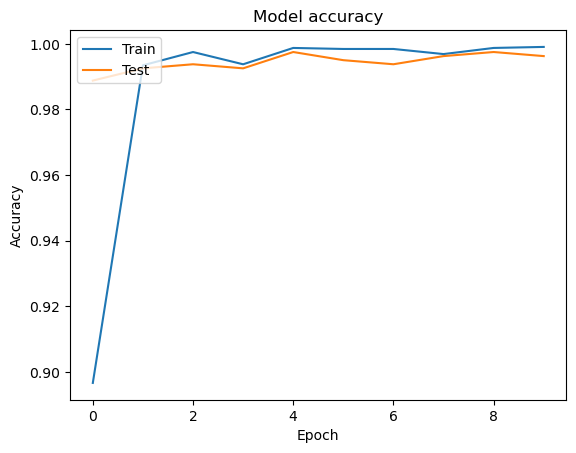

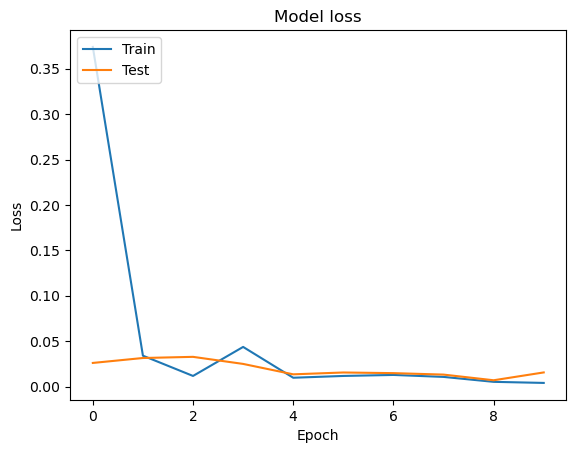

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.9962 - loss: 0.0146
Test Loss: 0.0156, Test Accuracy: 0.9963


In [3]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


In [4]:
# Save the trained model
model.save('cnn_model_keras3.h5')

In [5]:

#images, labels, num_classes, class_folders = load_data(data_dir)

print("Class Folders:", class_folders)

Class Folders: ['Hello', 'Help', 'I love you', 'No', 'OK', 'Please', 'Sorry', 'Thank you', 'Yes']


In [6]:
import os
import pandas as pd
def df(data_path):
    classes, class_paths = zip(*[(label, os.path.join(data_path, label, image))
                                 for label in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, label))
                                 for image in os.listdir(os.path.join(data_path, label))])

    df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return df

In [7]:
data=df(data_dir)

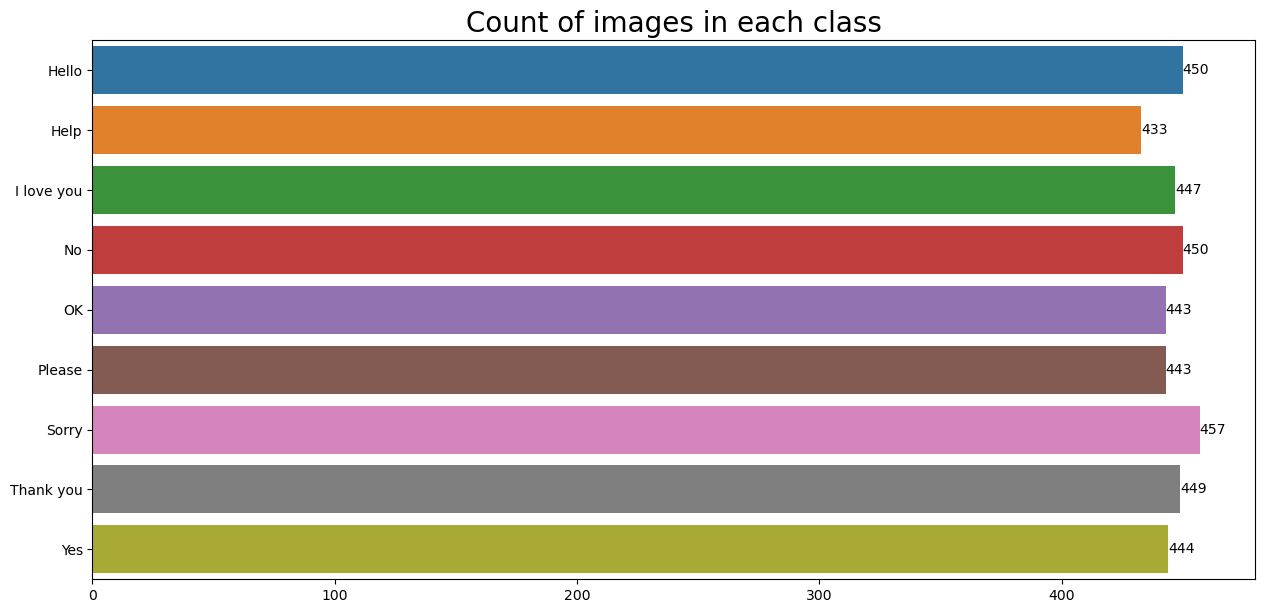

In [8]:
import seaborn as sns
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data, y=data['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step


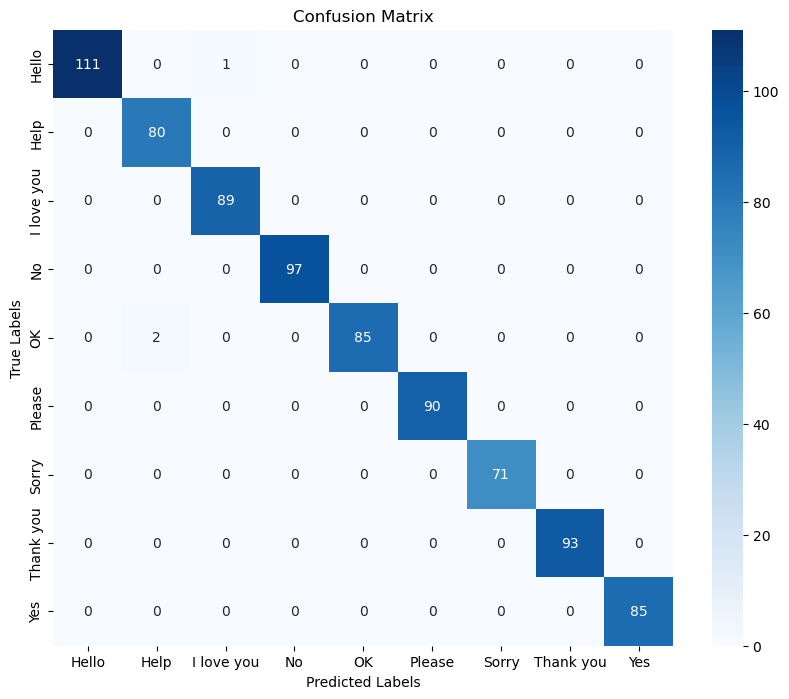

              precision    recall  f1-score   support

       Hello       1.00      0.99      1.00       112
        Help       0.98      1.00      0.99        80
  I love you       0.99      1.00      0.99        89
          No       1.00      1.00      1.00        97
          OK       1.00      0.98      0.99        87
      Please       1.00      1.00      1.00        90
       Sorry       1.00      1.00      1.00        71
   Thank you       1.00      1.00      1.00        93
         Yes       1.00      1.00      1.00        85

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Step 1: Generate predictions from the model
y_pred = model.predict(X_test)

# Step 2: Convert one-hot encoded predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 4: Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_folders, yticklabels=class_folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optional: Print a classification report to get more detailed metrics
print(classification_report(y_true_classes, y_pred_classes, target_names=class_folders))